# In This Project, I will be analysing the Sale and also explaining each of my analysing step

In [65]:
## install analysing library and tools
import pandas as pd                #handling dataframe
import numpy as np                 #handinh array and mas calculating
import matplotlib.pyplot as plt    #plot graph
import seaborn as sns              # plot graph

<font size = 6>
<div class = 'alert alert-block alert-warning'>
    <strong>Data Preparation</strong>
    </div>
    </font>

### จาก Folder SaleAnalysis จะเห็นได้ว่าข้อมูลการขายสินค้าถูกเเยกออกเป็น File Excel ของเเต่ละเดือน เเละเพื่อทำการวิเคราะห์จำเป็นที่จะต้องรวมไฟล์เหล่านั้นเป็นไฟล์เดียวกัน

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Concatenate File</strong>
    </div>
    </font>

In [66]:
import glob                                                     #Manage Path

path = r'.\SalesAnalysis'                                       #Set path
all_files = glob.glob(path + "/*.csv")                          #Select all the file that need to be merge in order to start analyze.

li = []                                                         #Set and empty array

for filename in all_files:                                      #For loop which will be storing data
    df = pd.read_csv(filename, index_col=None, header=0)        #Import and convert file into dataframe
    li.append(df)                                               #Store all the data

all_data = pd.concat(li, axis=0, ignore_index=True)             #Merge all the data in 'Li' array
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [67]:
all_data.rename(columns = {'Order ID': 'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each':'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)

#Set columns name (replace space between words with _)

### Handling Null

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Check for row that is null</strong>
    </div>
    </font>

In [68]:
all_data.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Eliminate row that is all Null</strong>
    </div>
    </font>

In [69]:
all_data.dropna(how = 'all',inplace = True)     #เeliminate null
all_data.isna().sum()                           #recheck for Null

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [70]:
all_data #Print Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Spilt time and date</strong>
    </div>
    </font>

In [71]:
all_data[['Date','Time']] = all_data.Order_Date.str.split(' ',expand = True) #Split Columns
all_data.drop(labels = 'Order_Date',axis = 1,inplace = True)                 #Drop old DataFrame
all_data #Print Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04/07/19,22:30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04/12/19,14:38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",09/01/19,16:00
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",09/23/19,07:39
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30


<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Split Day Month Year</strong>
    </div>
    </font>

In [72]:
all_data[['Month','Day','Year']] =all_data.Date.str.split('/',expand = True) #Split Columns
all_data.drop(labels = 'Date',axis = 1,inplace = True)                       #Drop old DataFrame
all_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Time,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46,04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30,04,07,19
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27,04,30,19
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",20:56,09,17,19
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",16:00,09,01,19
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",07:39,09,23,19
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",17:30,09,19,19


<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Transform String to Numeric</strong>
    </div>
    </font>

In [73]:
print (all_data[pd.to_numeric(all_data.Quantity_Ordered, errors='coerce').isnull()])
# Check for a row can't convert data and the result is that there are rows that is the duplicate

        Order_ID  Product  Quantity_Ordered  Price_Each  Purchase_Address  \
519     Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
1149    Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
1155    Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
2878    Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
2893    Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
...          ...      ...               ...         ...               ...   
185164  Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
185551  Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
186563  Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
186632  Order ID  Product  Quantity Ordered  Price Each  Purchase Address   
186738  Order ID  Product  Quantity Ordered  Price Each  Purchase Address   

        Time  Month   Day  Year  
519     Date  Order  None  None  
1149   

In [74]:
all_data.drop(all_data.loc[all_data['Quantity_Ordered'] == 'Quantity Ordered'].index,inplace = True)
#drop out the duplicate out

In [75]:
all_data['Price_Each'] = pd.to_numeric(all_data['Price_Each'])
all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity_Ordered'])
#convert String to Numeric

In [76]:
all_data.insert(4,'Total_Price',all_data['Quantity_Ordered']*all_data['Price_Each'])
#Insert Columns 'Total_Price' that is a total result (Price_Each * Quantity_Ordered)

In [77]:
all_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Total_Price,Purchase_Address,Time,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,23.90,"917 1st St, Dallas, TX 75001",08:46,04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,99.99,"682 Chestnut St, Boston, MA 02215",22:30,04,07,19
3,176560,Google Phone,1,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
4,176560,Wired Headphones,1,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,04,12,19
5,176561,Wired Headphones,1,11.99,11.99,"333 8th St, Los Angeles, CA 90001",09:27,04,30,19
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",20:56,09,17,19
186846,259354,iPhone,1,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",16:00,09,01,19
186847,259355,iPhone,1,700.00,700.00,"220 12th St, San Francisco, CA 94016",07:39,09,23,19
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,"511 Forest St, San Francisco, CA 94016",17:30,09,19,19


In [78]:
#exportFile
all_data.to_csv('all_data.csv',index = False)

<font size = 6>
<div class = 'alert alert-block alert-warning'>
    <strong>Analysis</strong>
    </div>
    </font>

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>What month has the maximum Sales?</strong>
    </div>
    </font>


In [79]:
all_data = pd.read_csv('all_data.csv')                              #import data
total_table = all_data.groupby(by = 'Month').sum()                  #group data by using month as a condition
total_table #show table

,Order_ID,Quantity_Ordered,Price_Each,Total_Price,Day,Year
Month,,,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06,155814,184505
2,1871052592,13449,2.188885e+06,2.202022e+06,174408,227525
3,2564810956,17005,2.791208e+06,2.807100e+06,241774,287907
4,3387347100,20558,3.367671e+06,3.390670e+06,282960,347301
5,3345871523,18667,3.135125e+06,3.152607e+06,264875,314754
6,2932976072,15253,2.562026e+06,2.577802e+06,209880,257526
7,3284139576,16072,2.632540e+06,2.647776e+06,227910,271567
8,2899373917,13448,2.230345e+06,2.244468e+06,192315,227259
9,2948726831,13109,2.084992e+06,2.097560e+06,180101,220799


In [80]:
total_table.reset_index()[['Month','Total_Price']].style.hide_index()   #Set to show on;y total_Price columns 

Month,Total_Price
1,1822256.730000
2,2202022.420000
3,2807100.380000
4,3390670.240001
5,3152606.750001
6,2577802.260000
7,2647775.760000
8,2244467.880000
9,2097560.130000
10,3736726.880001


In [81]:
total_table.reset_index()['Total_Price'].mean() #Find the average of the total sales in this data

2874336.3308337405

## Ans. From the table above, we see that december has the hightest Sales at 4.61 Millions Baht

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Why december has the most Sales?</strong>
    </div>
    </font>


In [82]:
all_data = pd.read_csv('all_data.csv') #import data
december_sales = all_data[all_data['Month'] == 12].groupby('Day').sum() #select sales data that was record on December
december_sales.sort_values('Quantity_Ordered',ascending = False).head() #Sort the data and show top 5 of Days that has the highest among of Quantity_Ordered  

,Order_ID,Quantity_Ordered,Price_Each,Total_Price,Month,Year
Day,,,,,,
17,270956791,1044,156335.63,157364.72,10572,16739
23,267393921,988,151015.66,152214.45,10428,16511
13,264934130,957,152702.00,153332.14,10332,16359
29,258739552,954,154159.42,156024.62,10092,15979
19,253385969,942,136908.24,137732.67,9876,15637


In [83]:
december_product = all_data[(all_data['Month'] == 12)].groupby('Product').sum()
december_product.sort_values('Quantity_Ordered',ascending = False).rename(columns = {'Quantity_Ordered': 'Quantity'}).head()[['Quantity']]

,Quantity
Product,
AAA Batteries (4-pack),4241
AA Batteries (4-pack),3724
USB-C Charging Cable,3250
Lightning Charging Cable,3087
Wired Headphones,2749


<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Sales Graph For Each Month </strong>
    </div>
    </font>


In [84]:
graph_data = total_table.reset_index() #Reset data index (Using nuber as a row instead of month)

<AxesSubplot:xlabel='Month', ylabel='Total_Price'>

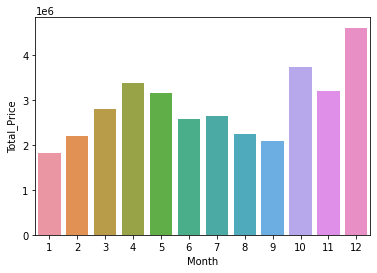

In [85]:
sns.barplot(x = 'Month',y = 'Total_Price',data = graph_data) #Plot Grah 

## We see that the first 4 months Sales is increasing but on the 5thUntil 9th month it start to drop and rapidly raise back on the 10th month. 

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Which City has the highest Sales?</strong>
    </div>
    </font>


In [86]:
all_data = pd.read_csv('all_data.csv') #import Data

In [87]:
all_data[['Street','City','Continent']] = all_data.Purchase_Address.str.split(',',expand = True)
#Split the Address Data

In [88]:
all_data #recheck the table

,Order_ID,Product,Quantity_Ordered,Price_Each,Total_Price,Purchase_Address,Time,Month,Day,Year,Street,City,Continent
0,176558,USB-C Charging Cable,2,11.95,23.90,"917 1st St, Dallas, TX 75001",08:46,4,19,19,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,99.99,"682 Chestnut St, Boston, MA 02215",22:30,4,7,19,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38,4,12,19,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,4,12,19,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,11.99,"333 8th St, Los Angeles, CA 90001",09:27,4,30,19,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",20:56,9,17,19,840 Highland St,Los Angeles,CA 90001
185946,259354,iPhone,1,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",16:00,9,1,19,216 Dogwood St,San Francisco,CA 94016
185947,259355,iPhone,1,700.00,700.00,"220 12th St, San Francisco, CA 94016",07:39,9,23,19,220 12th St,San Francisco,CA 94016
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,"511 Forest St, San Francisco, CA 94016",17:30,9,19,19,511 Forest St,San Francisco,CA 94016


In [89]:
total_city = all_data.groupby(by = 'City').sum() #Group Data by using City as the grouping data

In [90]:
total_city.sort_values(by = 'Total_Price',ascending = False) #Sort Data

,Order_ID,Quantity_Ordered,Price_Each,Total_Price,Month,Day,Year
City,,,,,,,
San Francisco,10304443952,50239,8.211462e+06,8.262204e+06,315520,702669,849920
Los Angeles,6811084693,33289,5.421435e+06,5.452571e+06,208325,469607,562496
New York City,5736333884,27932,4.635371e+06,4.664317e+06,175741,392706,472654
Boston,4598265261,22528,3.637410e+06,3.661642e+06,141112,312376,378750
Atlanta,3423838407,16602,2.779908e+06,2.795499e+06,104794,234837,282739
Dallas,3415643578,16730,2.752628e+06,2.767975e+06,104620,234435,281582
Seattle,3406693974,16553,2.733296e+06,2.747755e+06,104941,229552,279909
Portland,2868861092,14053,2.307747e+06,2.320491e+06,87765,197521,236837
Austin,2280982185,11153,1.809874e+06,1.819582e+06,69829,156782,188197


## From the Table above, you see that San Francisco has the highest Total Price at 8.26 millions

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>Sales Graph of each City</strong>
    </div>
    </font>


In [91]:
graph_data = total_city.reset_index() #Set Data to plot graph 

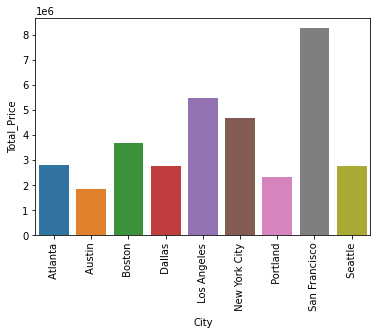

In [92]:
sns.barplot(x = 'City',y = 'Total_Price',data = graph_data) #Plot Graph
loc,labels = plt.xticks()        
plt.setp(labels,rotation=90)   #Set X-axis label to be vertical
plt.show()                     #plot graph

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>What time is the most optimize for promoting though ads</strong>
    </div>
    </font>


In [93]:
all_data = pd.read_csv('all_data.csv')  #Import Data

In [94]:
all_data[['Hour','Minutes']] = all_data.Time.str.split(':',expand = True) #Split Time into hour and mintues 

In [95]:
all_data_sort_time = all_data.sort_values(by = 'Hour',ascending = True) #Sort Data
all_data_sort_time #Print Data

,Order_ID,Product,Quantity_Ordered,Price_Each,Total_Price,Purchase_Address,Time,Month,Day,Year,Hour,Minutes
185949,259357,USB-C Charging Cable,1,11.95,11.95,"250 Meadow St, San Francisco, CA 94016",00:18,9,30,19,00,18
134547,208095,AA Batteries (4-pack),1,3.84,3.84,"357 Walnut St, San Francisco, CA 94016",00:23,5,8,19,00,23
134570,208117,USB-C Charging Cable,1,11.95,11.95,"159 Spruce St, San Francisco, CA 94016",00:45,5,24,19,00,45
134576,208123,USB-C Charging Cable,1,11.95,11.95,"137 Johnson St, Boston, MA 02215",00:58,5,6,19,00,58
18722,237092,Wired Headphones,1,11.99,11.99,"808 1st St, Boston, MA 02215",00:37,8,20,19,00,37
...,...,...,...,...,...,...,...,...,...,...,...,...
99207,217604,34in Ultrawide Monitor,1,379.99,379.99,"971 Spruce St, Los Angeles, CA 90001",23:18,6,11,19,23,18
142528,284626,AA Batteries (4-pack),1,3.84,3.84,"224 12th St, New York City, NY 10001",23:34,11,23,19,23,34
167885,272630,iPhone,1,700.00,700.00,"644 Church St, San Francisco, CA 94016",23:11,10,30,19,23,11
132415,206044,AAA Batteries (4-pack),2,2.99,5.98,"75 River St, San Francisco, CA 94016",23:13,5,28,19,23,13


In [96]:
#Select top 5 Hour which have the most amount of Order
all_data_sort_time['Hour'].value_counts().sort_values(ascending = False).head()

19    12905
12    12587
11    12411
18    12280
20    12228
Name: Hour, dtype: int64

## Ans From the data we see that 19.00 PM has the most order which mean that most customers were online at that time so we can launch the advertise to boost the sales

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>What product does sell together?</strong>
    </div>
    </font>

In [97]:
df = all_data[all_data['Order_ID'].duplicated(keep = False)]                       #Look for Duplicated
df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x:','.join(x))  #Join Data and group data using Order ID as a condition
df = df[['Order_ID','Grouped']].drop_duplicates()                                  #Drop the row which has the same Order_ID as the others
df.head() #Show data

<ipython-input-97-51634b763d4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x:','.join(x))  #Join Data and group data using Order ID as a condition


,Order_ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [98]:
#import library for count the duplicated Product
from itertools import combinations
from collections import Counter

In [99]:
count  = Counter()

for row in df['Grouped']:                    #Set loop the will go though the data and count the number of pair product
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) 

for key,value in count.most_common(10):     #Show top 10 Product with the most Sales
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Ans iPhone and Lightning Charging Cables is the most common pair to be bought together

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>What Product that has the highest amoung of Sales?</strong>
    </div>
    </font>


In [100]:
all_data = pd.read_csv('all_data.csv')
all_data.groupby(by = 'Product').sum()['Quantity_Ordered'].sort_values(ascending = False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity_Ordered, dtype: int64

## Ans. AAA Batteries has the most Sales

<font size = 4>
<div class = 'alert alert-block alert-info'>
    <strong>What Product has the most Sales?</strong>
    </div>
    </font>


In [101]:
all_data.groupby(by = 'Product').sum()['Total_Price'].sort_values(ascending = False) #Look for the Product which make the most Sales

Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Total_Price, dtype: float64

## Ans Macbook Pro Laptop is the product which make the most Sales.